In [93]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.bandstructure import *
from pymatgen.phonon.plotter import*
import math
import numpy as np 
import matplotlib.pyplot as plt

In [99]:
MP_id = "mp-867193"
API = "aEF0VdAXhHPNJOkG"

mpr = MPRester(API)

# téléchargement de la structure de bande de phonons du matériau
phonon_band = mpr.get_phonon_bandstructure_by_material_id(MP_id)
plot = PhononBSPlotter(phonon_band)

# Calcule de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin 

## Graphes des courbes de dispersion et de la zone de Brillouin 

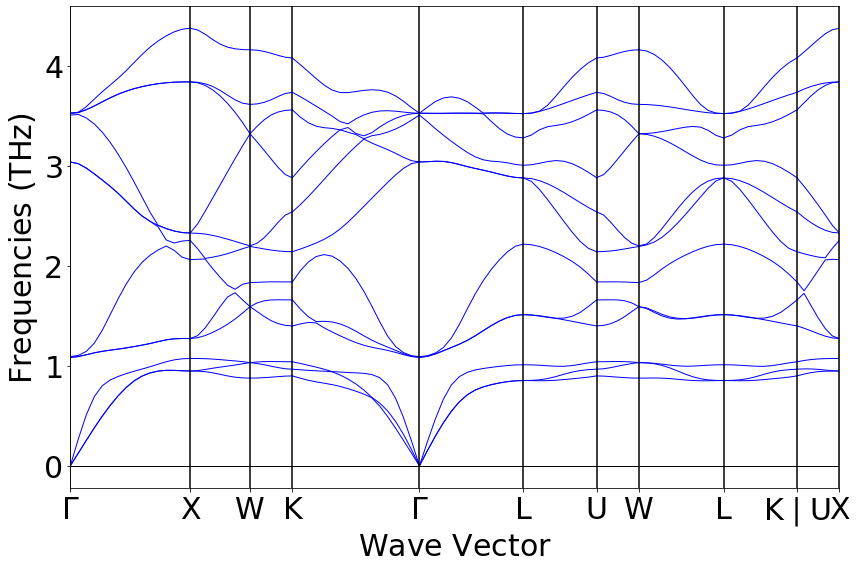

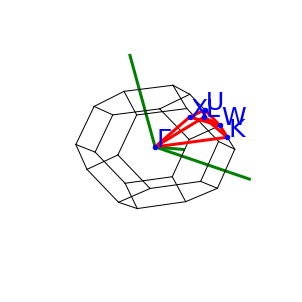

In [95]:
plot.get_plot() 
plot.plot_brillouin()

## Calcul des vitesses

In [96]:
# Récupérations des données
data = plot.bs_plot_data()
distances = data.get("distances")
frequency = data.get("frequency")

### Explication de la méthode 
La vitesse de propagation du son dans un solide est égale à la vitesse de propagation d'un phonon dans le réseau et est donnée par la pente ,$ \frac{∂\omega_{k}}{∂k}$, de la relation de dispersion ($ \omega_{k} = \sqrt  {2\omega ^{2}(1-\cos(ka)}$)
).
Nous allons faire une approximation linéaire de cette pente.


### Première branche selon première direction ( K - Γ )

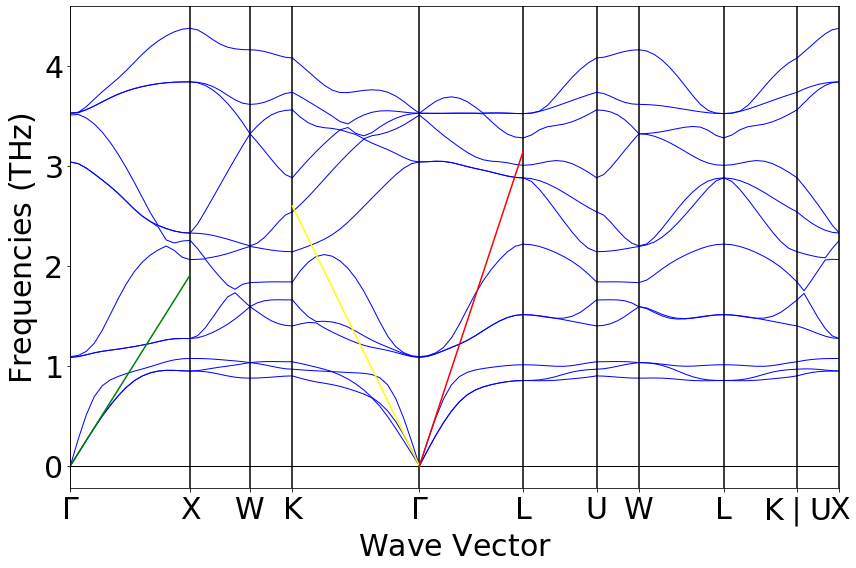

Vitesse du son pour la branche acoustique 1 selon la direction (Γ - X) =  1498.566275613888 [m/s]
Vitesse du son pour la branche acoustique 2 selon la direction (K - Γ)=  1923.9746548132468 [m/s]
Vitesse du son pour la branche acoustique 3 selon la direction (Γ - L) =  2853.845892585027 [m/s]


In [97]:
frequence1 = frequency[0][0] 
q1 = distances[0]
frequence2 = frequency[3][1] 
q2 = distances[3]
frequence3 = frequency[4][2] 
q3 = distances[4]

x = np.array([[q1[0], q1[1]], [q2[-2], q2[-1]], [q3[0], q3[1]]])
y = np.array([[frequence1[0], frequence1[1]], [frequence2[-2], frequence2[-1]], [frequence3[0], frequence3[1]]])

coeff = [0,0,0]
for i in range(0,3):
    coeff[i] = np.polyfit(x[i], y[i], 1)

x1 = np.linspace(q1[0],q1[-1],1000)
x2 = np.linspace(q2[0],q2[-1],1000)
x3 = np.linspace(q3[0],q3[-1],1000)

droite1 = coeff[0][0]*x1 + coef[0][1]
droite2 = coeff[1][0]*x2 + coef[1][1]
droite3 = coeff[2][0]*x3 + coef[2][1]

v1 = np.abs(coeff[0][0])* 2*math.pi*1e12*1e-10
v2 = np.abs(coeff[1][0])* 2*math.pi*1e12*1e-10
v3 = np.abs(coeff[2][0])* 2*math.pi*1e12*1e-10

#on plot les approximations
plot.get_plot()
plt.plot(x1, droite1, color='green')
plt.plot(x2, droite2, color='yellow')
plt.plot(x3, droite3, color='red')
plt.show()


print("Vitesse du son pour la branche acoustique 1 selon la direction (Γ - X) = ", v1, "[m/s]")
print("Vitesse du son pour la branche acoustique 2 selon la direction (K - Γ)= ", v2, "[m/s]")
print("Vitesse du son pour la branche acoustique 3 selon la direction (Γ - L) = ", v3, "[m/s]")